In [1]:
### Solution ###
import numpy as np

def entropy(p):
    """
    Calculates the entropy for a given proportion p of class-1.
    Uses log base 2.
    """
    # Handle the edge case where p=0 or p=1, as log2(0) is undefined.
    # In information theory, 0 * log2(0) is defined as 0.
    if p == 0 or p == 1:
        return 0
    
    q = 1 - p
    return -p * np.log2(p) - q * np.log2(q)

# --- Compute entropy of the parent node ---
# Total points = 1000
# Class-1 points = 200
p_parent = 200 / 1000

# Calculate and print the entropy
e_parent = entropy(p_parent)
print(f"The proportion of class-1 in the parent node is: {p_parent}")
print(f"The entropy of the parent node is: {e_parent:.4f}")

The proportion of class-1 in the parent node is: 0.2
The entropy of the parent node is: 0.7219


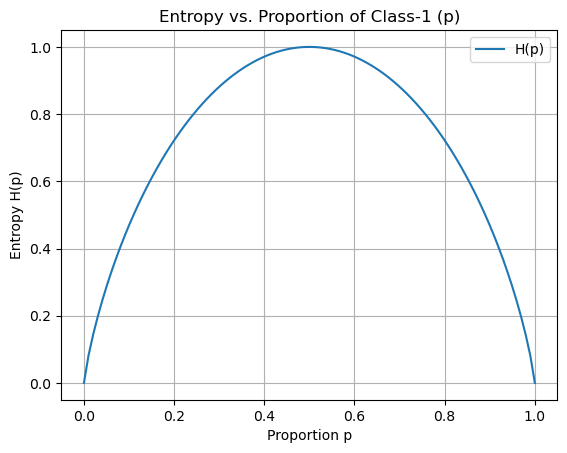

In [3]:
### Solution ###
import numpy as np
import matplotlib.pyplot as plt

# Define the entropy function again for this cell
def entropy(p):
    if p == 0 or p == 1:
        return 0
    q = 1 - p
    return -p * np.log2(p) - q * np.log2(q)

# 1. Create a range of p values from 0 to 1
# We use linspace to get 100 points in this range
p_values = np.linspace(0, 1, 100)

# 2. Calculate the entropy for each p value
# We can't pass the array directly because of the 0/1 check
entropy_values = [entropy(p) for p in p_values]

# 3. Plot the results
plt.plot(p_values, entropy_values, label='H(p)')
plt.title('Entropy vs. Proportion of Class-1 (p)')
plt.xlabel('Proportion p')
plt.ylabel('Entropy H(p)')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
### Solution ###
import numpy as np

# Define the entropy function again
def entropy(p):
    if p == 0 or p == 1:
        return 0
    q = 1 - p
    return -p * np.log2(p) - q * np.log2(q)

def IG(E, El, Er, gamma):
    """
    Calculates Information Gain.
    E: Entropy of parent
    El: Entropy of left child
    Er: Entropy of right child
    gamma: Proportion of data-points in left child
    """
    return E - (gamma * El + (1 - gamma) * Er)

# --- Compute Information Gain for the parent node ---

# 1. Parent Node (Q)
total_parent = 1000
class1_parent = 200
p_parent = class1_parent / total_parent
E = entropy(p_parent)

# 2. Left Child Node (L)
total_left = 100
class1_left = 50
p_left = class1_left / total_left
El = entropy(p_left)

# 3. Right Child Node (R)
total_right = total_parent - total_left         # 1000 - 100 = 900
class1_right = class1_parent - class1_left      # 200 - 50 = 150
p_right = class1_right / total_right
Er = entropy(p_right)

# 4. Gamma (proportion of points in left child)
gamma = total_left / total_parent  # 100 / 1000 = 0.1

# Calculate the Information Gain
information_gain = IG(E, El, Er, gamma)

print(f"Parent Entropy (E): {E:.4f}")
print(f"Left Child Entropy (El): {El:.4f}")
print(f"Right Child Entropy (Er): {Er:.4f}")
print(f"Gamma (γ): {gamma:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Parent Entropy (E): 0.7219
Left Child Entropy (El): 1.0000
Right Child Entropy (Er): 0.6500
Gamma (γ): 0.1000
Information Gain: 0.0369


In [7]:
### Solution ###

# Given information
N = 1000     # Total data-points in Q
p_Q = 0.4    # Proportion of class +1 in Q
gamma = 0.7  # Proportion of points in L

# Calculate absolute numbers
N_1 = N * p_Q      # Total class +1 points in Q = 1000 * 0.4 = 400
N_L = N * gamma    # Total points in L = 1000 * 0.7 = 700
N_R = N * (1 - gamma) # Total points in R = 1000 * 0.3 = 300

# q is the proportion of class +1 in L
# So, N_L_1 = N_L * q = 700 * q (Number of class +1 in L)

# The number of class +1 in R is:
# N_R_1 = N_1 - N_L_1 = 400 - 700 * q

# --- Constraints ---
# Constraint 1: Number of class +1 in L must be between 0 and N_L
# 0 <= N_L_1 <= N_L
# 0 <= 700 * q <= 700  =>  0 <= q <= 1

# Constraint 2: Number of class +1 in R must be between 0 and N_R
# 0 <= N_R_1 <= N_R
# 0 <= 400 - 700 * q <= 300

# Solve Constraint 2:
# a) 0 <= 400 - 700 * q  =>  700 * q <= 400  =>  q <= 400/700  => q <= 4/7
# b) 400 - 700 * q <= 300  =>  100 <= 700 * q  =>  q >= 100/700  => q >= 1/7

# We must satisfy all constraints: [0, 1] AND [1/7, 4/7]
# The intersection is [1/7, 4/7]
q_min = 1/7
q_max = 4/7

print(f"The minimum value of q (q_min) is: {q_min:.4f} (or 1/7)")
print(f"The maximum value of q (q_max) is: {q_max:.4f} (or 4/7)")

The minimum value of q (q_min) is: 0.1429 (or 1/7)
The maximum value of q (q_max) is: 0.5714 (or 4/7)


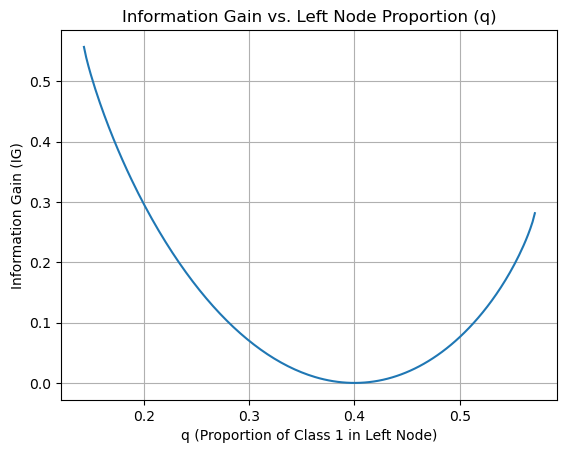

--- Observations ---
1. Information Gain is maximized at the boundaries (q_min and q_max). This is when the split is 'purest'—one of the child nodes (in this case, the right node) becomes perfectly pure (p_R=0 or p_R=1).
2. Information Gain is 0 when q = 0.4 (which is p_Q). This makes sense: if the split creates a left child with the exact same class proportion as the parent, the right child must also have that proportion, and no information has been gained.
3. The plot is symmetric around q = p_Q = 0.4.


In [9]:
### Solution ###
import numpy as np
import matplotlib.pyplot as plt

# Define the entropy function again
def entropy(p):
    if p == 0 or p == 1:
        return 0
    q = 1 - p
    return -p * np.log2(p) - q * np.log2(q)

# --- Setup values from Problem 4 ---
p_Q = 0.4
gamma = 0.7
N_R = 300.0  # Use float for division
N_1 = 400.0
N_L = 700.0

q_min = 1/7
q_max = 4/7

# Parent Entropy (constant)
E_parent = entropy(p_Q)

# --- Calculate IG as a function of q ---
q_values = np.linspace(q_min, q_max, 200)
ig_values = []

for q in q_values:
    # 1. Left Entropy
    E_left = entropy(q)
    
    # 2. Right proportion and Entropy
    p_right = (N_1 - N_L * q) / N_R
    E_right = entropy(p_right)
    
    # 3. Information Gain
    ig = E_parent - (gamma * E_left + (1 - gamma) * E_right)
    ig_values.append(ig)

# --- Plot the results ---
plt.plot(q_values, ig_values)
plt.title('Information Gain vs. Left Node Proportion (q)')
plt.xlabel('q (Proportion of Class 1 in Left Node)')
plt.ylabel('Information Gain (IG)')
plt.grid(True)
plt.show()

# --- Observations ---
print("--- Observations ---")
print("1. Information Gain is maximized at the boundaries (q_min and q_max). This is when the split is 'purest'—one of the child nodes (in this case, the right node) becomes perfectly pure (p_R=0 or p_R=1).")
print("2. Information Gain is 0 when q = 0.4 (which is p_Q). This makes sense: if the split creates a left child with the exact same class proportion as the parent, the right child must also have that proportion, and no information has been gained.")
print("3. The plot is symmetric around q = p_Q = 0.4.")

In [17]:
### Data ###
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

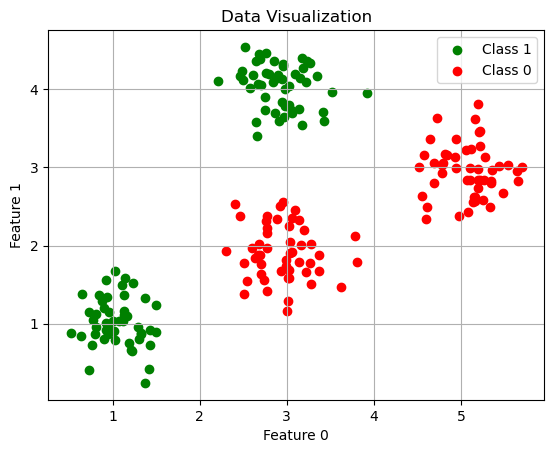

In [19]:
### Solution ###
import matplotlib.pyplot as plt

# X and y are loaded from the 'Data' cell
# Create boolean masks for each class
mask_class_0 = (y == 0)
mask_class_1 = (y == 1)

# Plot class 1 (green)
plt.scatter(X[mask_class_1, 0], X[mask_class_1, 1], c='green', label='Class 1')
# Plot class 0 (red)
plt.scatter(X[mask_class_0, 0], X[mask_class_0, 1], c='red', label='Class 0')

plt.title('Data Visualization')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
### Solution ###
import numpy as np

# Define the entropy function again
def entropy(p):
    if p == 0 or p == 1:
        return 0
    q = 1 - p
    return -p * np.log2(p) - q * np.log2(q)

def best_split(X, y):
    """
    Finds the best split (feature and threshold) for a dataset.
    """
    n_samples, n_features = X.shape
    
    # A node must have at least 2 samples to be split
    if n_samples <= 1:
        return None, None, 0

    # Calculate parent entropy
    p_parent = np.mean(y) # Proportion of class-1
    
    # If node is already pure, no split is possible
    if p_parent == 0 or p_parent == 1:
        return None, None, 0
    
    E_parent = entropy(p_parent)

    best_ig = 0.0
    best_feat = None
    best_value = None

    # Iterate over all features
    for k in range(n_features):
        # Find unique values for this feature
        unique_values = np.unique(X[:, k])
        
        # If all values are the same, we can't split
        if len(unique_values) == 1:
            continue
            
        # Create potential thresholds (midpoints between unique values)
        thresholds = (unique_values[:-1] + unique_values[1:]) / 2

        # Iterate over all thresholds
        for theta in thresholds:
            # Split the data
            left_indices = np.where(X[:, k] < theta)[0]
            right_indices = np.where(X[:, k] >= theta)[0]

            # If split is empty, skip
            if len(left_indices) == 0 or len(right_indices) == 0:
                continue

            # Calculate weighted average entropy of children
            p_left = np.mean(y[left_indices])
            E_left = entropy(p_left)

            p_right = np.mean(y[right_indices])
            E_right = entropy(p_right)

            gamma = len(left_indices) / n_samples
            
            # Calculate Information Gain
            ig = E_parent - (gamma * E_left + (1 - gamma) * E_right)

            # Update best split if this one is better
            if ig > best_ig:
                best_ig = ig
                best_feat = k
                best_value = theta
                
    return (best_feat, best_value, best_ig)

# --- Run the function on the data ---
# (X and y are from the 'Data' cell)
feat_best, value_best, ig_best = best_split(X, y)

print(f"Best feature index (k): {feat_best}")
print(f"Best threshold (theta): {value_best:.4f}")
print(f"Information Gain: {ig_best:.4f}")

Best feature index (k): 0
Best threshold (theta): 2.2535
Information Gain: 0.3193


In [23]:
### Solution ###
import numpy as np

# --- Assumes 'entropy' and 'best_split' are in memory ---
# (If not, re-run the cells for Problem 1 and Problem 7)

class Node:
    """
    A node in the decision tree.
    If it's a leaf node, `is_leaf` is True and `value` holds the prediction.
    If it's an internal node, `feature` and `threshold` define the split.
    """
    def __init__(self):
        self.is_leaf = False
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None # Prediction if leaf

def majority_class(y):
    """Calculates the majority class (0 or 1) in a set of labels."""
    if len(y) == 0:
        return 0 # Default case
    return int(np.mean(y) > 0.5)

def build_tree(X, y, max_depth=10, min_samples_split=2, depth=0):
    """
    Recursively builds a decision tree.
    """
    n_samples, n_features = X.shape
    
    # --- Stopping Criteria (Base Cases) ---
    
    # 1. Node is pure (all labels are the same)
    if len(np.unique(y)) == 1:
        node = Node()
        node.is_leaf = True
        node.value = y[0]
        return node
    
    # 2. Max depth reached or too few samples to split
    if depth >= max_depth or n_samples < min_samples_split:
        node = Node()
        node.is_leaf = True
        node.value = majority_class(y)
        return node

    # --- Recursive Step ---
    
    # 3. Find the best split
    feat_best, value_best, ig_best = best_split(X, y)
    
    # 4. No good split found (IG=0 or node is pure)
    if ig_best is None or ig_best <= 0:
        node = Node()
        node.is_leaf = True
        node.value = majority_class(y)
        return node
    
    # --- Create an internal node ---
    node = Node()
    node.feature = feat_best
    node.threshold = value_best
    
    # Split the data
    left_mask = (X[:, feat_best] < value_best)
    right_mask = (X[:, feat_best] >= value_best)
    
    # Build subtrees
    node.left = build_tree(X[left_mask], y[left_mask], max_depth, min_samples_split, depth + 1)
    node.right = build_tree(X[right_mask], y[right_mask], max_depth, min_samples_split, depth + 1)
    
    return node

def count_internal_nodes(node):
    """Recursively counts internal (split) nodes."""
    if node is None or node.is_leaf:
        return 0
    return 1 + count_internal_nodes(node.left) + count_internal_nodes(node.right)

def count_leaf_nodes(node):
    """Recursively counts leaf (prediction) nodes."""
    if node is None:
        return 0
    if node.is_leaf:
        return 1
    return count_leaf_nodes(node.left) + count_leaf_nodes(node.right)

# --- Build the tree and count the nodes ---
# (X and y are from the 'Data' cell)
tree_root = build_tree(X, y, max_depth=10)

internal_count = count_internal_nodes(tree_root)
leaf_count = count_leaf_nodes(tree_root)

print(f"The decision tree has {internal_count} internal nodes.")
print(f"The decision tree has {leaf_count} leaf nodes.")

The decision tree has 3 internal nodes.
The decision tree has 4 leaf nodes.


In [25]:
### Solution ###
import numpy as np

def predict_point(x, node):
    """
    Predicts the class for a single data point 'x'
    by traversing the 'node' (tree).
    """
    # Base case: we've reached a leaf node
    if node.is_leaf:
        return node.value
    
    # Recursive step: follow the split
    if x[node.feature] < node.threshold:
        return predict_point(x, node.left)
    else:
        return predict_point(x, node.right)

# --- Predict the label for (3, 4) ---
# (Assumes 'tree_root' is in memory from Problem 8)

x_test = np.array([3, 4])
prediction = predict_point(x_test, tree_root)

print(f"The predicted label for the point ({x_test[0]}, {x_test[1]}) is: {prediction}")

The predicted label for the point (3, 4) is: 1


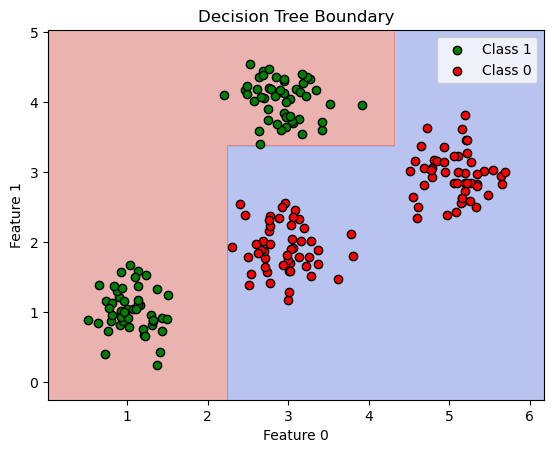

In [27]:
# 10
### Solution ###
import numpy as np
import matplotlib.pyplot as plt

# (Assumes 'tree_root', 'predict_point', 'X', and 'y' are in memory)

def predict_array(X_test, node):
    """Applies predict_point to each row in a matrix X_test."""
    return np.array([predict_point(x, node) for x in X_test])

# 1. Create a mesh grid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 2. Get predictions for every point on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = predict_array(grid_points, tree_root)
Z = Z.reshape(xx.shape)

# 3. Plot the decision boundary (contour plot)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)

# 4. Overlay the original data points
mask_class_0 = (y == 0)
mask_class_1 = (y == 1)
plt.scatter(X[mask_class_1, 0], X[mask_class_1, 1], c='green', label='Class 1', edgecolors='k')
plt.scatter(X[mask_class_0, 0], X[mask_class_0, 1], c='red', label='Class 0', edgecolors='k')

plt.title('Decision Tree Boundary')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.show()

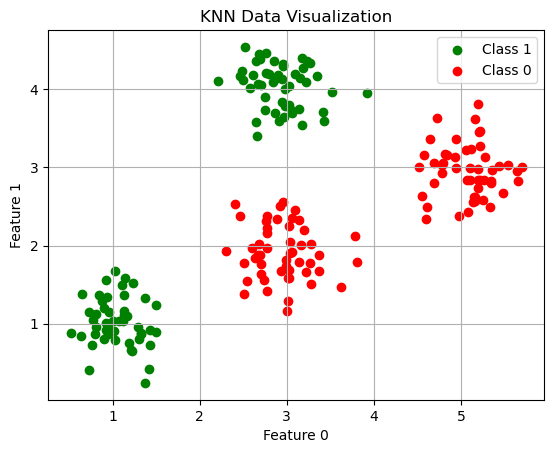

In [29]:
# 11
### Solution ###
import matplotlib.pyplot as plt

# X and y are loaded from the KNN 'Data' cell
# Create boolean masks for each class
mask_class_0 = (y == 0)
mask_class_1 = (y == 1)

# Plot class 1 (green)
plt.scatter(X[mask_class_1, 0], X[mask_class_1, 1], c='green', label='Class 1')
# Plot class 0 (red)
plt.scatter(X[mask_class_0, 0], X[mask_class_0, 1], c='red', label='Class 0')

plt.title('KNN Data Visualization')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# 12
### Solution ###
import numpy as np
from scipy.stats import mode

def predict(X, y, x_test, k):
    """
    Predicts the label for x_test using k-Nearest Neighbors.
    """
    # 1. Calculate Euclidean distances from x_test to all points in X
    distances = np.linalg.norm(X - x_test, axis=1)
    
    # 2. Get the indices of the k-smallest distances
    k_nearest_indices = np.argsort(distances)[:k]
    
    # 3. Get the labels of these k neighbors
    k_nearest_labels = y[k_nearest_indices]
    
    # 4. Return the majority class (mode)
    # mode() returns (array_of_modes, array_of_counts)
    # We take [0][0] to get the first mode (the most common label)
    majority_vote = mode(k_nearest_labels, keepdims=True)[0][0]
    
    return int(majority_vote)

# --- Compute prediction for (-3, -2) with k=10 ---
# (X and y are from the KNN 'Data' cell)
x_test_point = np.array([-3, -2])
k_val = 10

prediction = predict(X, y, x_test_point, k_val)

print(f"The predicted label for the point {x_test_point} with k={k_val} is: {prediction}")

The predicted label for the point [-3 -2] with k=10 is: 1


Plotting decision boundaries...


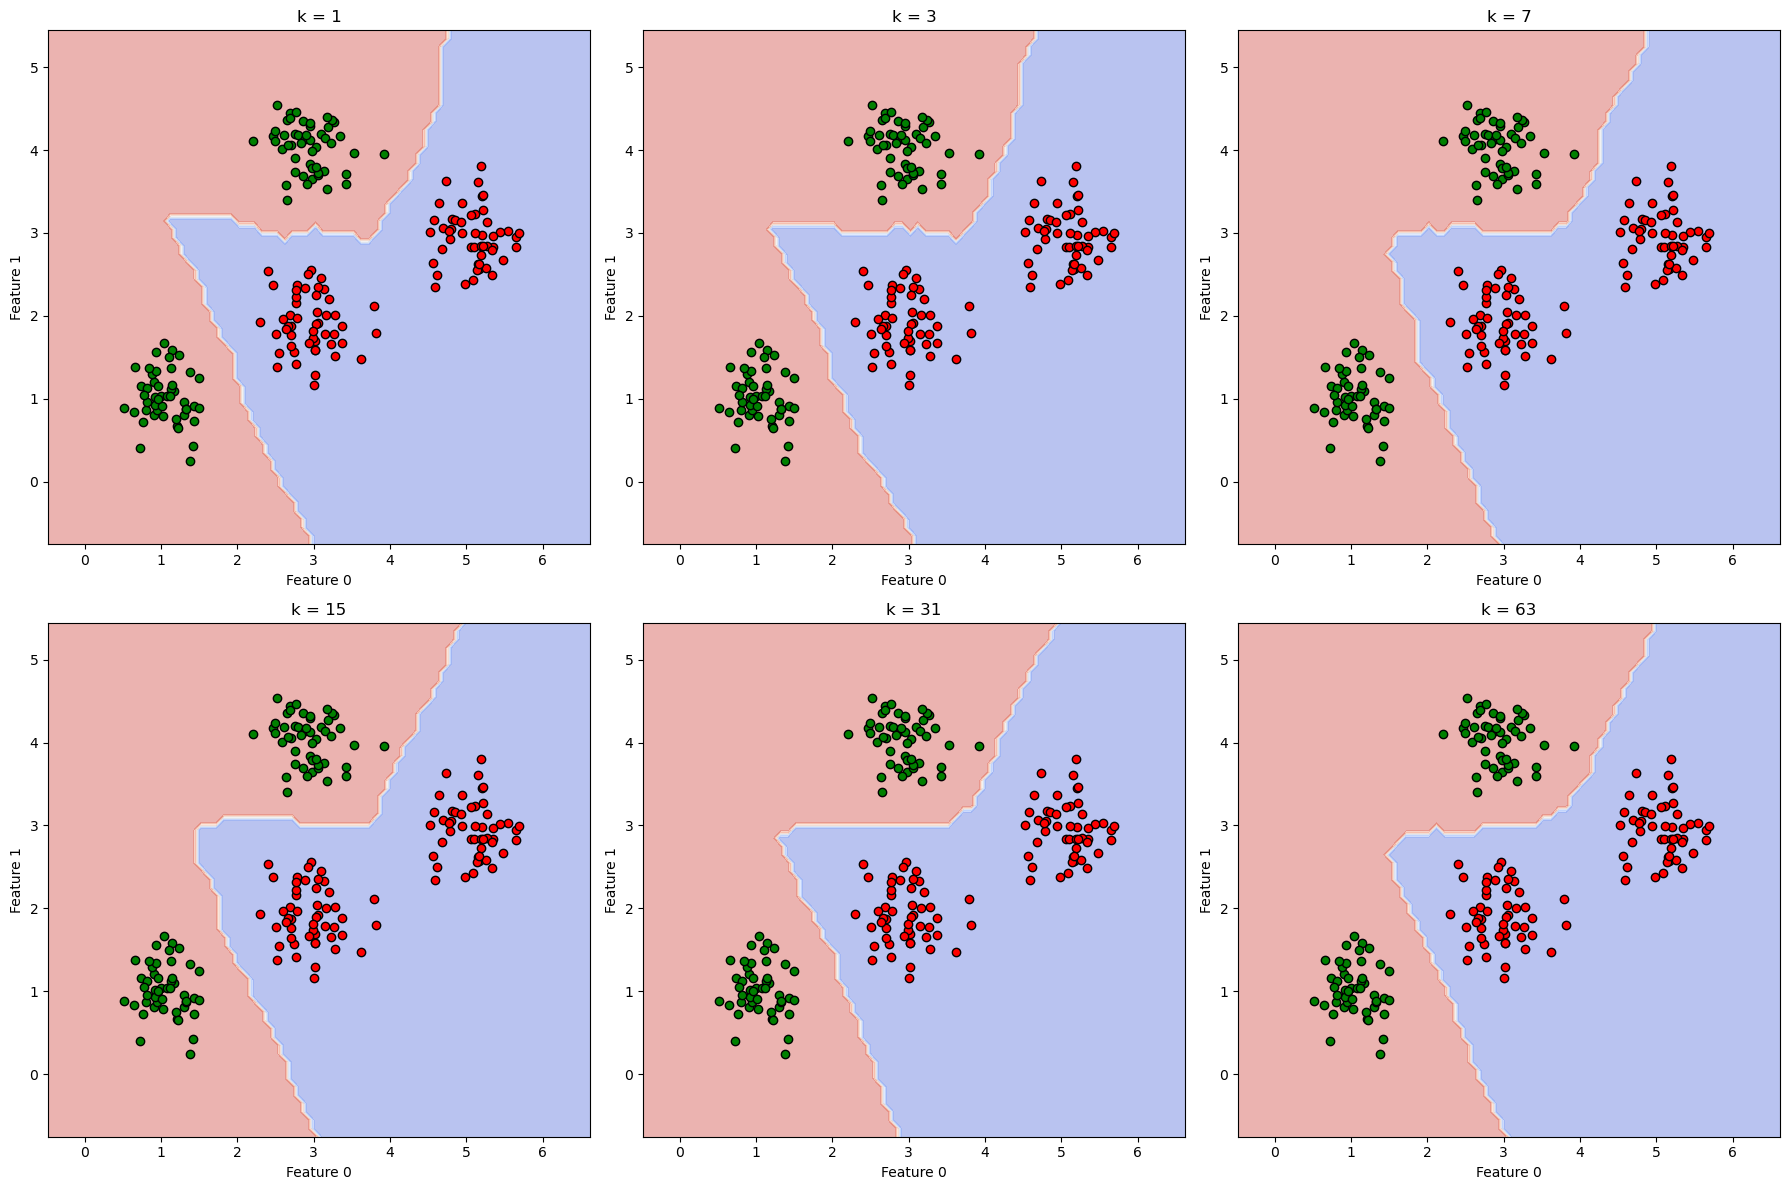

--- Observations ---
1. Low k (e.g., k=1): The decision boundary is very complex and 'jagged'. It is highly sensitive to individual data points, including the noisy red cluster at (-5, 5). This is a sign of high variance and overfitting.
2. High k (e.g., k=63): The decision boundary becomes much smoother and captures the main linear trend (y=x). The influence of the small, noisy red cluster is averaged out. This is a sign of high bias and underfitting (as it misses the local pattern).
3. As 'k' increases, the model's complexity decreases, and the boundary transitions from being highly flexible (low bias, high variance) to being very rigid (high bias, low variance).


In [33]:
# 13
### Solution ###
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# (X and y are from the KNN 'Data' cell)

k_values = [1, 3, 7, 15, 31, 63]
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel() # Flatten the 2x3 grid to 1D array for easy looping

# 1. Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

grid_points = np.c_[xx.ravel(), yy.ravel()]

print("Plotting decision boundaries...")

for i, k in enumerate(k_values):
    # Use scikit-learn's KNN for fast boundary plotting
    # This implements the same logic as your 'predict' function
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # 2. Predict for each grid point
    Z = knn.predict(grid_points)
    Z = Z.reshape(xx.shape)
    
    # 3. Plot contour
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    
    # 4. Overlay scatter plot
    mask_0 = (y == 0)
    mask_1 = (y == 1)
    ax.scatter(X[mask_1, 0], X[mask_1, 1], c='green', label='Class 1', edgecolors='k')
    ax.scatter(X[mask_0, 0], X[mask_0, 1], c='red', label='Class 0', edgecolors='k')
    
    ax.set_title(f'k = {k}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

plt.tight_layout()
plt.show()

# --- Observations ---
print("--- Observations ---")
print("1. Low k (e.g., k=1): The decision boundary is very complex and 'jagged'. It is highly sensitive to individual data points, including the noisy red cluster at (-5, 5). This is a sign of high variance and overfitting.")
print("2. High k (e.g., k=63): The decision boundary becomes much smoother and captures the main linear trend (y=x). The influence of the small, noisy red cluster is averaged out. This is a sign of high bias and underfitting (as it misses the local pattern).")
print("3. As 'k' increases, the model's complexity decreases, and the boundary transitions from being highly flexible (low bias, high variance) to being very rigid (high bias, low variance).")